<a href="https://colab.research.google.com/github/Satish-970/ATS_Checker_Job-Description/blob/main/ATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setting up the Colab Environment

In [9]:
# Install required libraries
!pip install spacy PyPDF2 scikit-learn
!python -m spacy download en_core_web_sm

# Import libraries
import spacy
import PyPDF2
from sklearn.feature_extraction.text import TfidfVectorizer  # Fixed typo
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from ipywidgets import FileUpload, Textarea, Button, Output
from IPython.display import display

print("Setup complete!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Setup complete!


In [13]:
def extract_resume_text(pdf_path):
    with open(pdf_path, 'rb') as file:  # Open in binary mode
        reader = PyPDF2.PdfReader(file)
        text = ''  # Initialize empty string
        for page in reader.pages:  # Loop through each page
            text += page.extract_text() + ' '  # Add page text
    return text.strip()  # Remove extra spaces

# Test it: Upload a PDF via Colab's left sidebar (Files > Upload), then run:
resume_text = extract_resume_text('Resume.pdf')
print(resume_text[:500])

Satish  Pakalapati  
LinkedIn : www.linkedin.com/in/satishpakalapati  Email:  satishpakal apati65@gmail.com  
GitHub:  https://github.com/Satish -970  Mobile:  +91 9666899631 
Portfolio:  https://satishpakalapati.netlify.app/  
SKILLS  
 
Languages : 
Frameworks/Libraries: 
Tools/Platforms : 
Soft  Skills : Python,  Java,  R, SQL,  Scala,  HTML,  JS 
Num Py, Scikit -Learn, Spring, Pandas  
Excel, Tableau, Jupyter Notebook, MySQL Workbench,  PostgreSQL,  Maven  
Problem -Solving,  Team  Player,  


In [18]:
nlp = spacy.load('en_core_web_sm')  # Load the spaCy model
def extract_keywords(text):
    """
    Extracts keywords (nouns, proper nouns, and custom skills) from text.
    """
    doc = nlp(text.lower())  # Process text (lowercase for consistency)
    keywords = set()  # Use set to avoid duplicates
    for token in doc:  # Loop through tokens (words/phrases)
        if token.pos_ in ['NOUN', 'PROPN'] or token.text in ['python', 'sql', 'machine learning', 'data analysis']:  # Filter for relevant parts
            keywords.add(token.text)
    return keywords
# Test:
sample_text = "Experienced in Python and SQL. Skilled in machine learning."
keywords = extract_keywords(sample_text)
print(keywords)  # Output: {'python', 'sql', 'machine learning', ...}

{'sql', 'machine', 'python', 'learning'}


In [19]:
def calculate_ats_score(resume_text, job_description):
    """
    Computes similarity score between resume and job description.
    """
    documents = [resume_text, job_description]  # List of texts
    vectorizer = TfidfVectorizer()  # Create TF-IDF vectorizer
    tfidf_matrix = vectorizer.fit_transform(documents)  # Convert to vectors
    similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]  # Calculate similarity
    return similarity * 100  # Return as percentage

# Test:
job_desc = "Requirements: Python, SQL, Machine Learning."
score = calculate_ats_score(sample_text, job_desc)
print(f"ATS Score: {score:.2f}%")

ATS Score: 38.76%


In [20]:
def get_suggestions(resume_keywords, job_keywords):
    """
    Finds keywords in job desc not in resume.
    """
    missing = job_keywords - resume_keywords  # Set difference
    if missing:
        return f"Suggestions: Add {', '.join(missing)} to your resume."
    return "Great match! No suggestions."

# Test:
resume_kw = extract_keywords(sample_text)
job_kw = extract_keywords(job_desc)
print(get_suggestions(resume_kw, job_kw))


Suggestions: Add requirements to your resume.


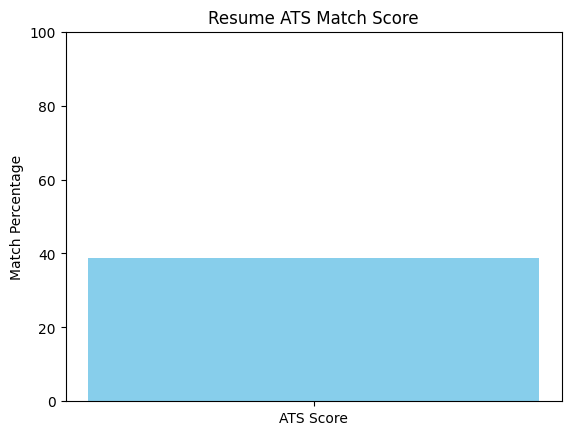

In [24]:
def visualize_score(score):
    """
    Plots a bar chart of the ATS score.
    """
    plt.bar(['ATS Score'], [score], color='skyblue')
    plt.ylim(0, 100)  # Set y-axis limits
    plt.ylabel('Match Percentage')
    plt.title('Resume ATS Match Score')
    plt.show()
visualize_score(score)

In [25]:
upload = FileUpload(accept='.pdf', description='Upload Resume PDF')
job_desc = Textarea(placeholder='Paste job description here', description='Job Desc:')
button = Button(description='Check ATS Score')
output = Output()

def on_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous output
        if upload.value:
            # Get uploaded file name and content
            uploaded_file = list(upload.value.values())[0]
            with open('temp_resume.pdf', 'wb') as f:
                f.write(uploaded_file['content'])
            resume_text = extract_resume_text('temp_resume.pdf')
            job_text = job_desc.value
            resume_keywords = extract_keywords(resume_text)
            job_keywords = extract_keywords(job_text)
            ats_score = calculate_ats_score(resume_text, job_text)
            print(f"ATS Match Score: {ats_score:.2f}%")
            print(get_suggestions(resume_keywords, job_keywords))
            visualize_score(ats_score)
        else:
            print("Please upload a resume PDF.")

button.on_click(on_button_clicked)
display(upload, job_desc, button, output)


FileUpload(value={}, accept='.pdf', description='Upload Resume PDF')

Textarea(value='', description='Job Desc:', placeholder='Paste job description here')

Button(description='Check ATS Score', style=ButtonStyle())

Output()